<a href="https://colab.research.google.com/github/ELKHAYARI-DOUAA/Travail-a-faire-Instagram-Analytics-Dataset/blob/main/code_instagram_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

# Charger le fichier CSV
file_path = "/content/Instagram_Analytics.csv"
df = pd.read_csv(file_path)

print("Shape:", df.shape)
df.head()


Shape: (29999, 15)


,post_id,upload_date,media_type,likes,comments,shares,saves,reach,impressions,caption_length,hashtags_count,followers_gained,traffic_source,engagement_rate,content_category
0,IG0000001,2024-11-30 09:25:22.954916,Reel,31627,7559,4530,6393,615036,1007750,1340,3,899,Home Feed,4.97,Technology
1,IG0000002,2025-08-15 09:25:22.954916,Photo,63206,3490,1680,6809,1237071,1345900,1351,20,805,Hashtags,5.59,Fitness
2,IG0000003,2025-09-11 09:25:22.954916,Reel,94373,3727,1761,8367,1127470,1305369,242,24,758,Reels Feed,8.29,Beauty
3,IG0000004,2025-09-18 09:25:22.954916,Reel,172053,7222,2875,9290,764030,897874,446,11,402,External,21.32,Music
4,IG0000005,2025-03-21 09:25:22.954916,Video,99646,2703,4444,9746,7004,495406,1905,8,155,Profile,23.52,Technology


In [ ]:
# Aperçu des types
df.info()

# Nettoyage basique
df = df.drop_duplicates()

# Convertir timestamp si présent
if 'timestamp' in df.columns:
    df['timestamp'] = pd.to_datetime(df['timestamp'], errors='coerce')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29999 entries, 0 to 29998
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   post_id           29999 non-null  object 
 1   upload_date       29999 non-null  object 
 2   media_type        29999 non-null  object 
 3   likes             29999 non-null  int64  
 4   comments          29999 non-null  int64  
 5   shares            29999 non-null  int64  
 6   saves             29999 non-null  int64  
 7   reach             29999 non-null  int64  
 8   impressions       29999 non-null  int64  
 9   caption_length    29999 non-null  int64  
 10  hashtags_count    29999 non-null  int64  
 11  followers_gained  29999 non-null  int64  
 12  traffic_source    29999 non-null  object 
 13  engagement_rate   29999 non-null  float64
 14  content_category  29999 non-null  object 
dtypes: float64(1), int64(9), object(5)
memory usage: 3.4+ MB


In [ ]:
# Likes + comments
df['likes'] = df['likes'].fillna(0)
df['comments'] = df['comments'].fillna(0)
df['engagement'] = df['likes'] + df['comments']

# The original code attempted to use a 'followers' column which does not exist.
# Since an 'engagement_rate' column already exists in the dataframe,
# we will not recalculate it here to avoid errors.
# If you wish to calculate a new 'engagement_rate' using 'reach' or 'impressions',
# please specify, and I can generate the appropriate code.

df[['engagement', 'engagement_rate']].head()

,engagement,engagement_rate
0,39186,4.97
1,66696,5.59
2,98100,8.29
3,179275,21.32
4,102349,23.52


In [ ]:
# The 'caption' column does not exist in the DataFrame.
# 'caption_length' and 'hashtags_count' columns already exist.
# We will skip the operations that depend on the 'caption' column.
# If you have the raw caption data, please load it into a 'caption' column
# for these operations to be performed.

# Variables temporelles
# First, ensure 'upload_date' is in datetime format
if 'upload_date' in df.columns:
    df['upload_date'] = pd.to_datetime(df['upload_date'], errors='coerce')
    df['hour'] = df['upload_date'].dt.hour
    df['weekday'] = df['upload_date'].dt.weekday
    df['is_weekend'] = df['weekday'].isin([5, 6]).astype(int)

# Display some of the newly created or relevant columns for verification
df[['upload_date', 'hour', 'weekday', 'is_weekend', 'caption_length', 'hashtags_count']].head()

,upload_date,hour,weekday,is_weekend,caption_length,hashtags_count
0,2024-11-30 09:25:22.954916,9,5,1,1340,3
1,2025-08-15 09:25:22.954916,9,4,0,1351,20
2,2025-09-11 09:25:22.954916,9,3,0,242,24
3,2025-09-18 09:25:22.954916,9,3,0,446,11
4,2025-03-21 09:25:22.954916,9,4,0,1905,8


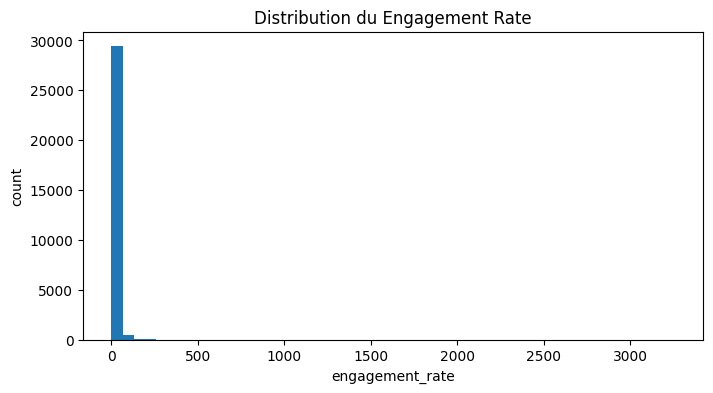

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,4))
plt.hist(df['engagement_rate'], bins=50)
plt.title("Distribution du Engagement Rate")
plt.xlabel("engagement_rate")
plt.ylabel("count")
plt.show()


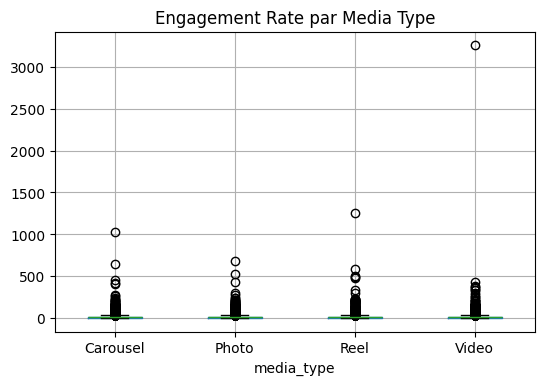

In [ ]:
if 'media_type' in df.columns:
    df.boxplot(column='engagement_rate', by='media_type', figsize=(6,4))
    plt.title("Engagement Rate par Media Type")
    plt.suptitle("")
    plt.show()


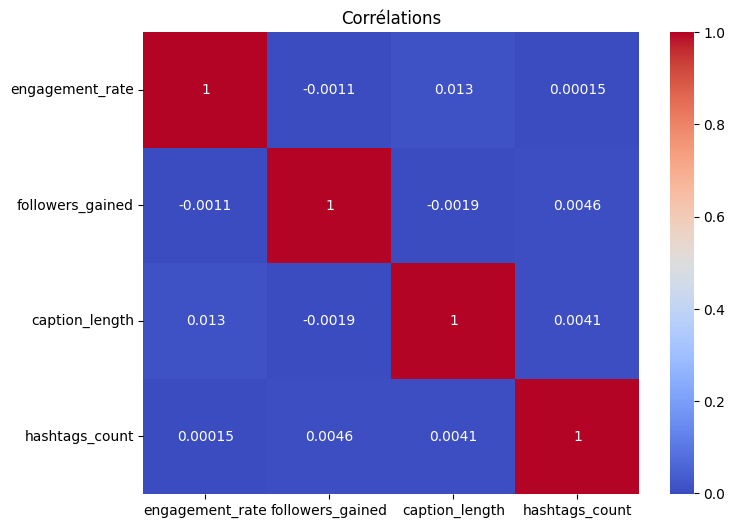

In [ ]:
import seaborn as sns

plt.figure(figsize=(8,6))
num_cols = ['engagement_rate', 'followers_gained', 'caption_length', 'hashtags_count']
sns.heatmap(df[num_cols].corr(), annot=True, cmap="coolwarm")
plt.title("Corrélations")
plt.show()

In [ ]:
feature_cols = [
    'caption_length', 'hashtags_count',
    'followers_gained', 'hour', 'weekday', 'is_weekend'
]

X = df[feature_cols]
y = df['engagement_rate']

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [ ]:
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np # Import numpy for sqrt

model = make_pipeline(StandardScaler(), Ridge(alpha=1.0))
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("RMSE:", rmse)
print("R²:", r2)

RMSE: 49.725257964506994
R²: -0.0006155980266429051
